C:\Users\agast\AppData\Local\Temp\ipykernel_6572\3594239323.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = columns[0]
C:\Users\agast\AppData\Local\Temp\ipykernel_6572\3594239323.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  passenger_class = columns[1]


ValueError: Classification metrics can't handle a mix of binary and continuous targets

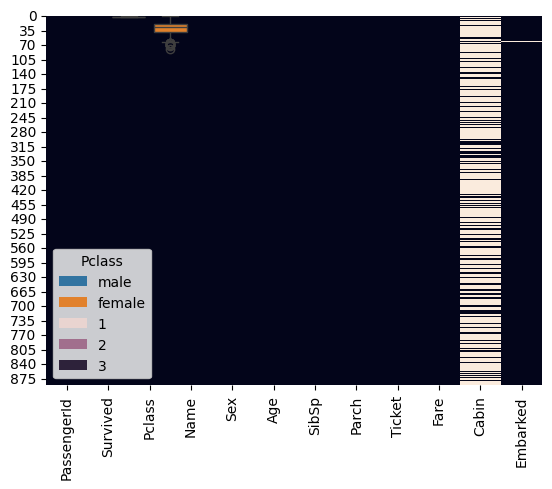

In [6]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns



titanic_data = pd.read_csv('C:\\Users\\agast\\Downloads\\titanic\\train.csv')



sns.heatmap(titanic_data.isnull(), cbar=False)

sns.countplot(x='Survived', data=titanic_data)

sns.countplot(x='Survived', hue='Sex', data=titanic_data)

sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

plt.hist(titanic_data['Age'].dropna())

plt.hist(titanic_data['Fare'])

sns.boxplot((titanic_data['Pclass'], titanic_data['Age']))



def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()

        

    else:

        return age



titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)



sns.heatmap(titanic_data.isnull(), cbar=False)


titanic_data.drop('Cabin', axis=1, inplace = True)

titanic_data.dropna(inplace = True)



sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)

embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)


titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)

new_titanic_data = titanic_data.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1)


new_titanic_data.head()



y_data = new_titanic_data['Survived']

x_data = new_titanic_data.drop('Survived', axis = 1)


from sklearn.model_selection import train_test_split

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)



from sklearn.linear_model import LinearRegression

model = LinearRegression() # training the model

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)


from sklearn.metrics import classification_report

print(classification_report(y_test_data, predictions))


from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))